# Task 2: Modulate and demodulate  amplitude  shift  keying (FSK)  signal  from  a  random  binary sequence

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

## Input binary data sequence

In [2]:
b = np.random.randint(2, size = 1000)
print(b)

[1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0
 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 

## Set sample and carrier information

In [3]:
Tb = 0.001
f_carry_0 = 5000
f_carry_1 = 10000
n = b.shape[0]
t = Tb*n
Spb = 1000
x = np.arange(0, t, Tb/Spb)
c_0 = np.sin(2*np.pi*f_carry_0*x)
c_1 = np.sin(2*np.pi*f_carry_1*x)

## Modulation

### Plot the carrier signal

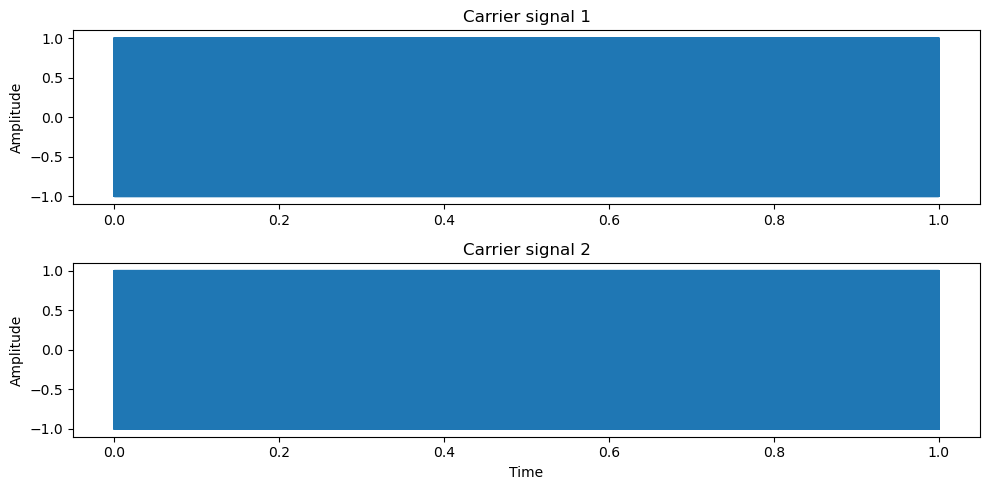

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (10,5))
ax1.set_title('Carrier signal 1')
ax1.set_ylabel('Amplitude')
ax1.plot(x, c_0)
ax2.set_title('Carrier signal 2')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.plot(x, c_1)
fig.tight_layout()
plt.show()

### Plot the binary data sequence

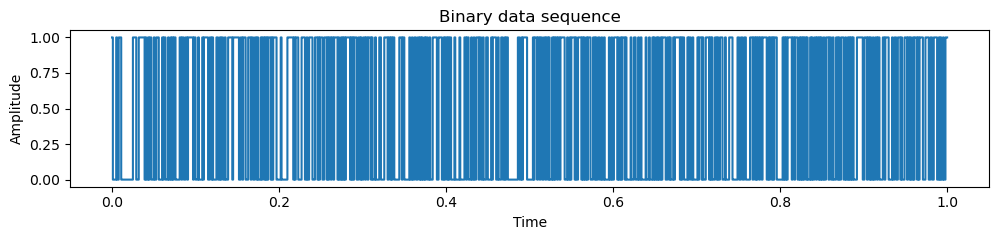

In [5]:
data = np.repeat(b, Spb)
plt.figure(figsize=(10, 2.5))
plt.title('Binary data sequence')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.step(x, data)
plt.tight_layout()
plt.show()

### Plot the FSK modulated signal

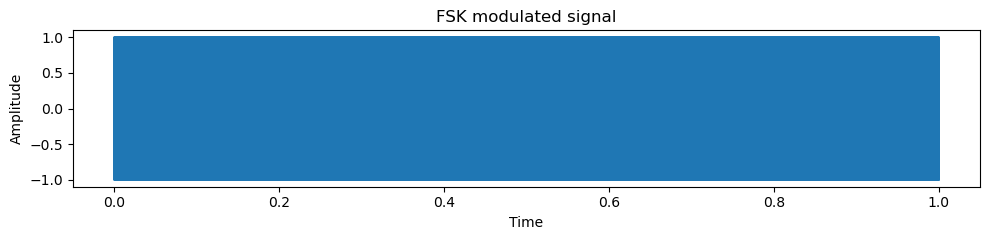

In [6]:
mod = np.where(data == 0, data + c_0, data*c_1)
plt.figure(figsize=(10, 2.5))
plt.title('FSK modulated signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.plot(x, mod)
plt.tight_layout()
plt.show()

## Demodulation

### Initialize demodulated sequence

In [7]:
demod = np.zeros(n).astype('int')

### Correlate and obtain demodulated binary data based on decision variables 

In [8]:
for i in range(0, n*Spb, Spb):
    I_0 = np.trapz(mod[i:i+Spb]*c_0[i:i+Spb])
    e_0 = np.sum(c_0[i:i+Spb]**2)
    I_1 = np.trapz(mod[i:i+Spb]*c_1[i:i+Spb])
    e_1 = np.sum(c_1[i:i+Spb]**2)
    if I_0 - 1/2*e_0 > I_1 - 1/2*e_1:
       demod[np.floor(i/Spb).astype('int')] = 0
    else:
       demod[np.floor(i/Spb).astype('int')] = 1

### Print out and plot demodulated binary sequence and input sequence for comparing

Demodulated sequence:	 [1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0
 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 0

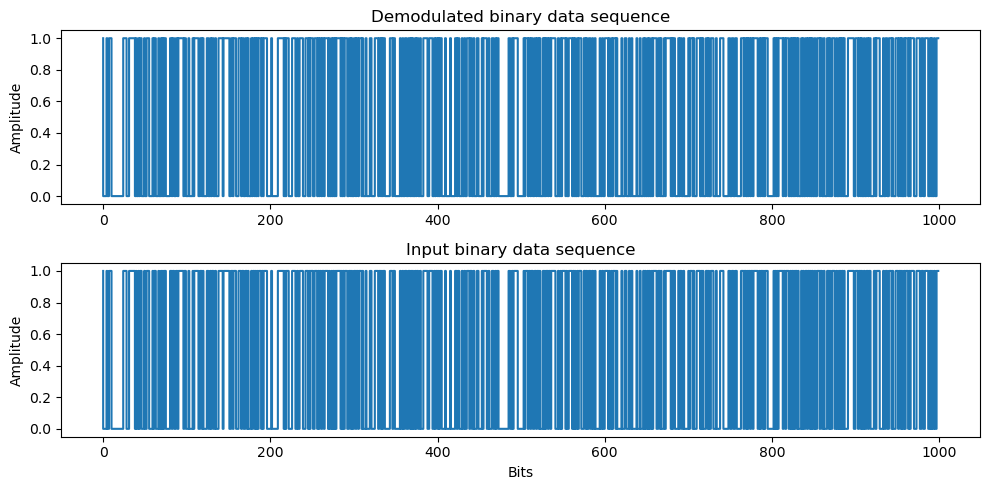

In [9]:
print('Demodulated sequence:\t', demod)
print('Input sequence:\t\t', b)
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (10,5))
ax1.set_title('Demodulated binary data sequence')
ax1.set_ylabel('Amplitude')
ax1.step(np.arange(n), demod)
ax2.set_title('Input binary data sequence')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Bits')
ax2.step(np.arange(n), b)
fig.tight_layout()
plt.show()

## Add White Gaussian noise with zero mean

### Set mean and variance of AWGN and genarate noise

In [10]:
mu = 0
sigma = 1
noise = np.random.normal(mu, sigma, x.shape[0])

### Add noise to transmitted waveform and plot the effect of noise to the signal

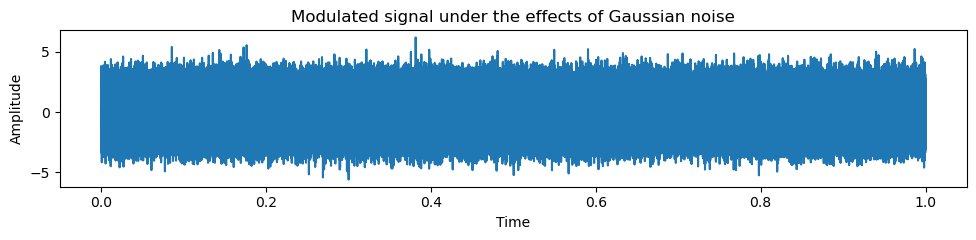

In [11]:
r_t = mod + noise
plt.figure(figsize=(10, 2.5))
plt.title('Modulated signal under the effects of Gaussian noise')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.plot(x, r_t)
plt.tight_layout()
plt.show()

### Demodulate using the same correlate method

Demodulated sequence:	 [1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0
 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 0

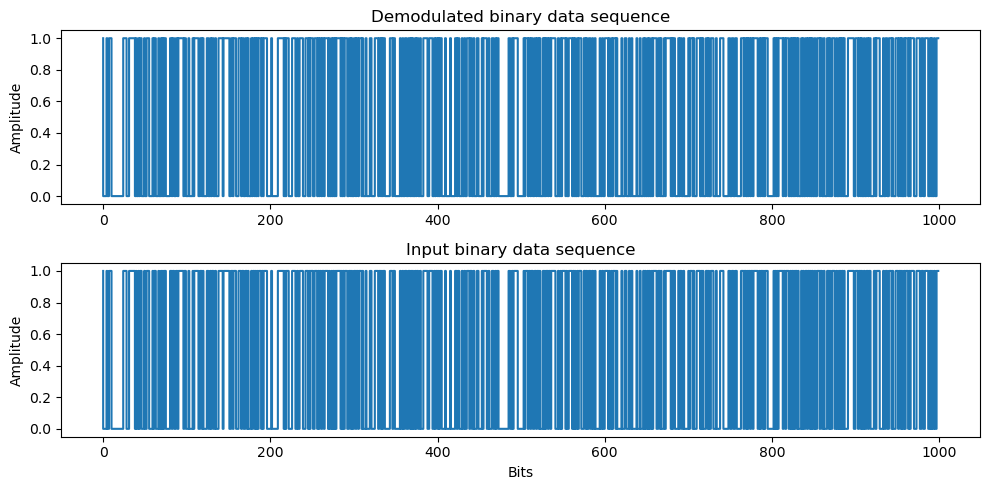

In [12]:
demod_new = np.zeros(n).astype('int')
for i in range(0, n*Spb, Spb):
    I_0 = np.trapz(r_t[i:i+Spb]*c_0[i:i+Spb])
    e_0 = np.sum(c_0[i:i+Spb]**2)
    I_1 = np.trapz(r_t[i:i+Spb]*c_1[i:i+Spb])
    e_1 = np.sum(c_1[i:i+Spb]**2)
    if I_0 - 1/2*e_0 > I_1 - 1/2*e_1:
       demod_new[np.floor(i/Spb).astype('int')] = 0
    else:
       demod_new[np.floor(i/Spb).astype('int')] = 1
print('Demodulated sequence:\t', demod_new)
print('Input sequence:\t\t', b)
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (10,5))
ax1.set_title('Demodulated binary data sequence')
ax1.set_ylabel('Amplitude')
ax1.step(np.arange(n), demod)
ax2.set_title('Input binary data sequence')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Bits')
ax2.step(np.arange(n), b)
fig.tight_layout()
plt.show()

### Compute the error probability numerically

In [13]:
print(f'Error probability: {np.argwhere(demod_new != b).shape[0]/n*100}%')

Error probability: 0.0%


In [17]:
sigma_arr = np.linspace(35, 6, 100)
ber = np.zeros_like(sigma_arr).astype('float')
for j in range(sigma_arr.shape[0]):
    noises = np.random.normal(0, sigma_arr[j], x.shape[0])
    r = mod + noises
    demods = np.zeros(n).astype('int')
    for i in range(0, n*Spb, Spb):
        I_0 = np.trapz(r[i:i+Spb]*c_0[i:i+Spb])
        e_0 = np.sum(c_0[i:i+Spb]**2)
        I_1 = np.trapz(r[i:i+Spb]*c_1[i:i+Spb])
        e_1 = np.sum(c_1[i:i+Spb]**2)
        if I_0 - 1/2*e_0 > I_1 - 1/2*e_1:
           demods[np.floor(i/Spb).astype('int')] = 0
        else:
           demods[np.floor(i/Spb).astype('int')] = 1
    ber[j] = np.argwhere(demods != b).shape[0]/n
print(ber)

[0.343 0.326 0.327 0.315 0.324 0.317 0.322 0.304 0.321 0.307 0.318 0.296
 0.311 0.311 0.287 0.319 0.321 0.299 0.332 0.293 0.315 0.289 0.326 0.297
 0.281 0.277 0.282 0.277 0.253 0.294 0.273 0.259 0.285 0.295 0.294 0.251
 0.269 0.274 0.262 0.233 0.235 0.238 0.241 0.239 0.243 0.248 0.241 0.245
 0.24  0.227 0.214 0.204 0.188 0.21  0.213 0.207 0.214 0.2   0.198 0.174
 0.159 0.163 0.158 0.165 0.159 0.19  0.158 0.147 0.138 0.146 0.144 0.113
 0.133 0.135 0.112 0.118 0.108 0.09  0.096 0.097 0.075 0.082 0.072 0.083
 0.045 0.057 0.052 0.047 0.04  0.047 0.03  0.018 0.024 0.028 0.019 0.012
 0.015 0.008 0.006 0.003]


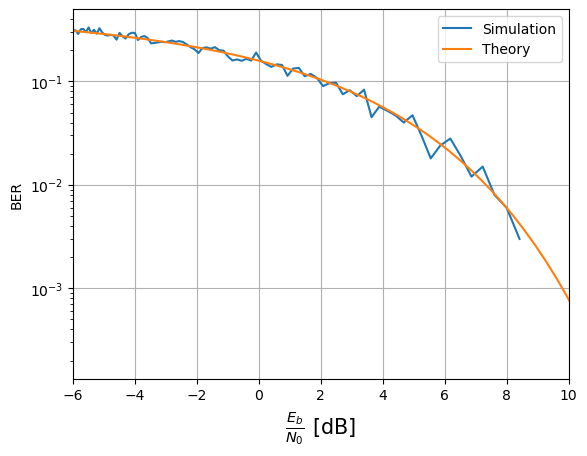

In [22]:
N0 = 2*sigma_arr**2
Eb = 1/2*(np.trapz((c_0**2)[0:Spb])+np.trapz((c_1**2)[0:Spb]))
xx = 10*np.log10(Eb/N0)
plt.grid()
plt.xticks(np.arange(-6, 11, 2))
plt.xlim(-6,10)
plt.xlabel(r"$\frac{E_b}{N_0}$ [dB]", size = 15)
plt.ylabel("BER")
plt.semilogy(xx, ber, label = "Simulation")
x1 = np.linspace(-6, 11)
fsk = 1/2*scipy.special.erfc(np.sqrt(10**(x1/10)/2))
plt.semilogy(x1, fsk, label = "Theory")
plt.legend()
plt.show()